# Выбор локации для скважины

Мы работаем в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Построим модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируем возможную прибыль и риски техникой Bootstrap.

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Оценка-входных-данных" data-toc-modified-id="Оценка-входных-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Оценка входных данных</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Проверка-признаков-на-мультиколлинеарность" data-toc-modified-id="Проверка-признаков-на-мультиколлинеарность-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проверка признаков на мультиколлинеарность</a></span><ul class="toc-item"><li><span><a href="#Проверка-мультиколлинеарности-по-1-региону" data-toc-modified-id="Проверка-мультиколлинеарности-по-1-региону-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Проверка мультиколлинеарности по 1 региону</a></span></li><li><span><a href="#Проверка-мультиколлинераности-по-2-региону" data-toc-modified-id="Проверка-мультиколлинераности-по-2-региону-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Проверка мультиколлинераности по 2 региону</a></span></li><li><span><a href="#Проверка-мультиколлинеарности-по-3-региону" data-toc-modified-id="Проверка-мультиколлинеарности-по-3-региону-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Проверка мультиколлинеарности по 3 региону</a></span></li><li><span><a href="#Описание-этапа-проверки-данных" data-toc-modified-id="Описание-этапа-проверки-данных-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Описание этапа проверки данных</a></span></li></ul></li><li><span><a href="#Проверка-дубликатов" data-toc-modified-id="Проверка-дубликатов-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проверка дубликатов</a></span><ul class="toc-item"><li><span><a href="#Описание-этапа-проверки-дубликатов" data-toc-modified-id="Описание-этапа-проверки-дубликатов-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Описание этапа проверки дубликатов</a></span></li></ul></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span><ul class="toc-item"><li><span><a href="#Рассчитаем-достаточный-объем-сырья-для-безубыточной-разработки-новой-скважины." data-toc-modified-id="Рассчитаем-достаточный-объем-сырья-для-безубыточной-разработки-новой-скважины.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Рассчитаем достаточный объем сырья для безубыточной разработки новой скважины.</a></span><ul class="toc-item"><li><span><a href="#Расчет(в-млн.-руб.):" data-toc-modified-id="Расчет(в-млн.-руб.):-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Расчет(в млн. руб.):</a></span></li><li><span><a href="#Напишем-функцию-для-расчета-прибыли-по-выбранным-скважинам-и-предсказаниям-модели" data-toc-modified-id="Напишем-функцию-для-расчета-прибыли-по-выбранным-скважинам-и-предсказаниям-модели-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Напишем функцию для расчета прибыли по выбранным скважинам и предсказаниям модели</a></span></li></ul></li></ul></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li></ul></div>

## Загрузка и подготовка данных

### Оценка входных данных

In [1]:
# импортируем необходимые библиотеки для работы
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# убираем незначительные предупреждения
warnings.filterwarnings('ignore')
# убираем лимиты на максимальное количество отображаемых данных
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# откроем и сохраним файлы выборок для дальнейшей работы
try:
    data_0 = pd.read_csv('C:/Users/fokin/OneDrive/Рабочий стол/Дата Сайнс/Машинное обучение в бизнесе/Проект/geo_data_0.csv')
    data_1 = pd.read_csv('C:/Users/fokin/OneDrive/Рабочий стол/Дата Сайнс/Машинное обучение в бизнесе/Проект/geo_data_1.csv')
    data_2 = pd.read_csv('C:/Users/fokin/OneDrive/Рабочий стол/Дата Сайнс/Машинное обучение в бизнесе/Проект/geo_data_2.csv')
except:
    data_0 = pd.read_csv('/datasets/geo_data_0.csv')
    data_1 = pd.read_csv('/datasets/geo_data_1.csv')
    data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
# отобразим данные на экране для предварительного ознакомления
# выборка по 1 региону
print('Выборка по 1 региону')
display(data_0.head(10))
display(data_0.tail(10))
print()
# выборка по 2 региону
print('Выборка по 2 региону')
display(data_1.head(10))
display(data_1.tail(10))
print()
# выборка по 3 региону
print('Выборка по 3 региону')
display(data_2.head(10))
display(data_2.tail(10))
print()

Выборка по 1 региону


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


,id,f0,f1,f2,product
99990,uQHju,-0.169592,0.988432,5.153578,121.253686
99991,5aJ79,-0.880711,0.173065,6.962537,152.614843
99992,vgK5D,0.637601,0.751503,2.918322,95.180855
99993,sOhIk,-0.176367,0.912145,5.241132,89.619662
99994,hWIah,1.562007,-0.311641,1.315442,50.092191
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764
99999,1CWhH,1.764754,-0.266417,5.722849,149.633246



Выборка по 2 региону


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


,id,f0,f1,f2,product
99990,6HSBo,4.280434,-1.692187,1.011469,26.953261
99991,obwpN,2.233158,-1.970310,1.004117,26.953261
99992,BYhdw,-2.150114,-13.278717,3.002298,84.038886
99993,FOKH6,-8.421251,-2.813906,4.997337,137.945408
99994,VfVub,-8.646179,-3.661656,-0.003027,3.179103
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364
99999,relB0,-3.426139,-7.794274,-0.003299,3.179103



Выборка по 3 региону


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


,id,f0,f1,f2,product
99990,QlYmx,-1.182179,2.127844,2.338479,78.502786
99991,AAcyW,1.570887,-2.430724,5.733563,83.577214
99992,yDrAl,-2.365583,0.148640,2.062216,151.374166
99993,uHI1Q,2.633658,1.873285,-0.498951,33.627420
99994,B2U80,-1.889398,0.851823,6.805412,96.866615
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253
99999,V9kWn,-2.551421,-2.025625,6.090891,102.775767


In [4]:
# отобразим сводную информацию о данных по регионам
# выборка по 1 региону
print('Выборка по 1 региону')
display(data_0.info())
display(data_0.columns)
display(data_0.describe())
print()
# выборка по 2 региону
print('Выборка по 2 региону')
display(data_1.info())
display(data_1.columns)
display(data_1.describe())
print()
# выборка по 3 региону
print('Выборка по 3 региону')
display(data_2.info())
display(data_2.columns)
display(data_2.describe())
print()

Выборка по 1 региону
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347



Выборка по 2 региону
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408



Выборка по 3 региону
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


### Описание данных

Данные геологоразведки трёх регионов были получены из файлов:
- /datasets/geo_data_0.csv
- /datasets/geo_data_1.csv
- /datasets/geo_data_2.csv

В датасетах присутствовали следующие признаки:
- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (нет информации, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).

Исходя из входных данных будем эти данные нет необходимости масштабировать, т.к. объемы запасов - это целевой признак, а признаки точек все значимы. Вносить каких-либо явных корректировок нет необходимости.

### Проверка признаков на мультиколлинеарность

#### Проверка мультиколлинеарности по 1 региону

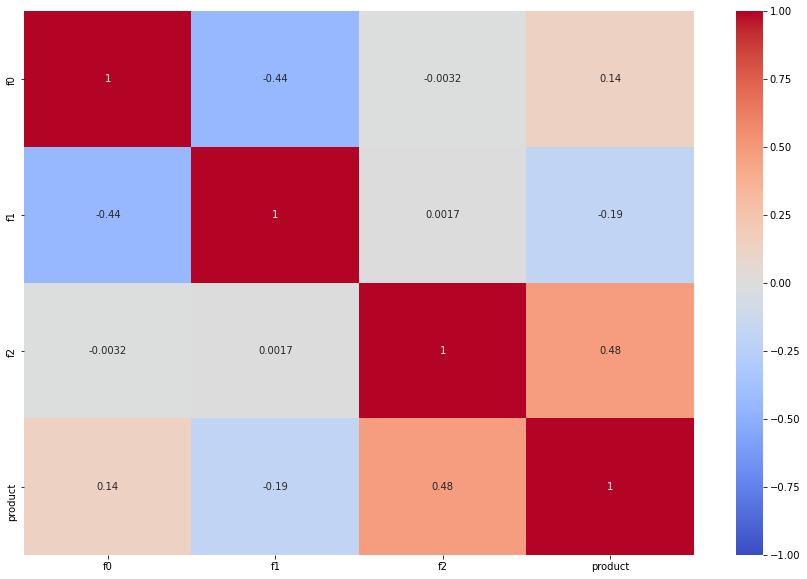

In [5]:
# построим хитмэп для наглядного отображения корреляций
plt.figure(figsize=(15,10))
sns.heatmap(data_0.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.show()

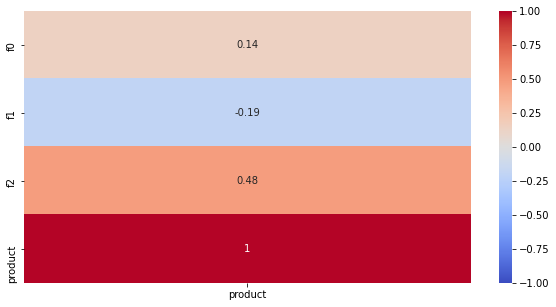

In [6]:
# построим хитмэп по целевому признаку и выявим корреляции
plt.figure(figsize=(10,5))
sns.heatmap(data_0.corr()[['product']], vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.show()

#### Проверка мультиколлинераности по 2 региону

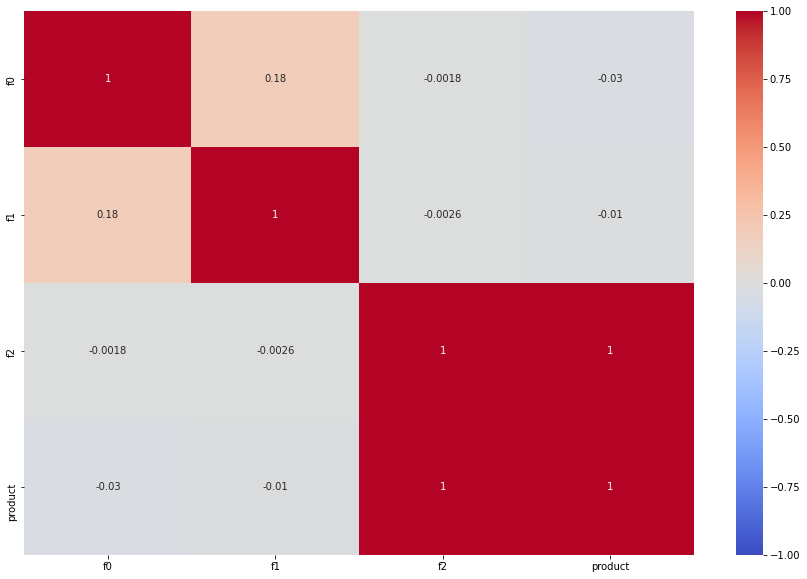

In [7]:
# построим хитмэп для наглядного отображения корреляций
plt.figure(figsize=(15,10))
sns.heatmap(data_1.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.show()

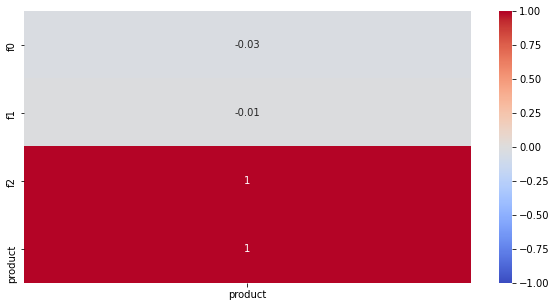

In [8]:
# построим хитмэп по целевому признаку и выявим корреляции
plt.figure(figsize=(10,5))
sns.heatmap(data_1.corr()[['product']], vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.show()

#### Проверка мультиколлинеарности по 3 региону

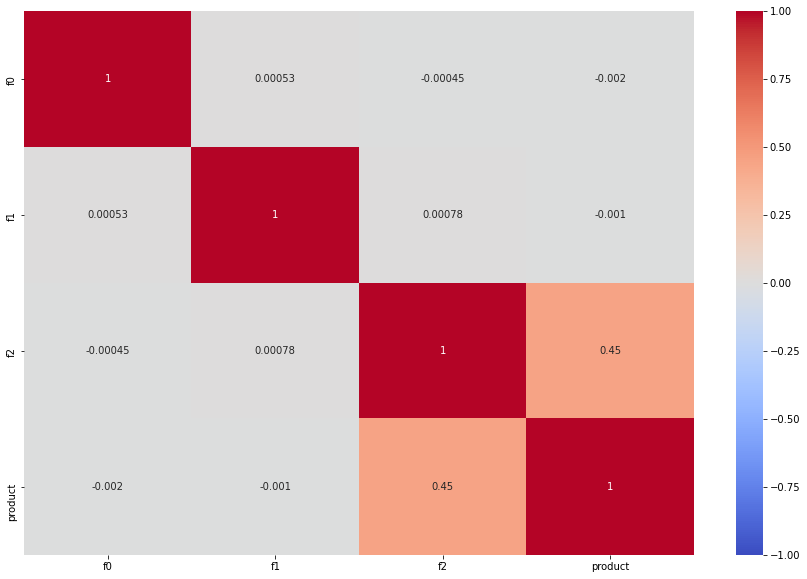

In [9]:
# построим хитмэп для наглядного отображения корреляций
plt.figure(figsize=(15,10))
sns.heatmap(data_2.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.show()

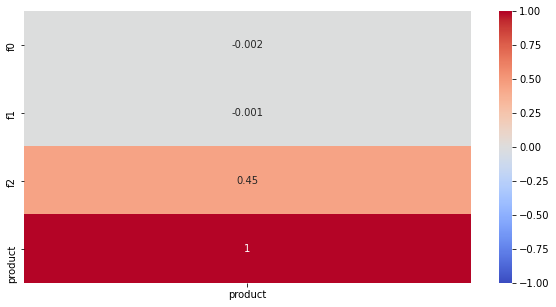

In [10]:
# построим хитмэп по целевому признаку и выявим корреляции
plt.figure(figsize=(10,5))
sns.heatmap(data_2.corr()[['product']], vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.show()

#### Описание этапа проверки данных

Максимальные обнаруженные корреляции:
- выборка 1 региона: признак f2 и product - 0.48, корреляция не значимая; наибольшая незначимая обратная корреляция между признаком f0 и f1 - 0.44, 
- выборка 2 региона: признак f2 и product - 1, корреляция значимая,
- выборка 3 региона: признак f2 и product - 0.45, корреляция не значимая.

Исходя из того, что во 2 регионе корреляция значимая - рекомендуется обсудить связанный признак с заказчиком и, возможно, уточнить входящие признаки таким образом.

### Проверка дубликатов

In [11]:
print('Количество дубликатов в выборке 1 региона')
display(data_0.duplicated().sum())
print('Количество дубликатов в выборке 2 региона')
display(data_1.duplicated().sum())
print('Количество дубликатов в выборке 3 региона')
display(data_2.duplicated().sum())

Количество дубликатов в выборке 1 региона


0

Количество дубликатов в выборке 2 региона


0

Количество дубликатов в выборке 3 региона


0

#### Описание этапа проверки дубликатов

Проверка на предмет наличия дубликатов, результат проверки - отсутствие дубликатов в выборках подтверждено.

## Обучение и проверка модели

In [12]:
# удалим id из наборов данных
data_0 = data_0.drop('id', axis=1)
data_1 = data_1.drop('id', axis=1)
data_2 = data_2.drop('id', axis=1)

In [13]:
# напишем функцию по моделированию по алгоритму линейной регрессии
def teach_model_linear_regression(region_data, region_number):
    target_region = region_data['product']
    features_region = region_data.drop('product', axis=1)
    features_region_train, features_region_valid, target_region_train, target_region_valid = train_test_split(features_region,  target_region, train_size=0.75, random_state=654321)
    model_region = LinearRegression()
    model_region.fit(features_region, target_region)
    predicted_valid_region = model_region.predict(features_region_valid)
    mean = predicted_valid_region.mean()
    rmse = mean_squared_error(target_region_valid, predicted_valid_region)**0.5
    print('Данные по региону №', region_number)
    print('Средний запас предсказанного сырья:', mean)
    print('RMSE модели:', rmse)
    print()
    return features_region_train, features_region_valid, target_region_train, target_region_valid, mean, rmse, target_region, features_region, predicted_valid_region

In [14]:
# получим данные по 3-м регионам
features_region_0_train, features_region_0_valid, target_region_0_train, target_region_0_valid, mean_region_0, rmse_region_0, target_region_0, features_region_0, predicted_valid_region_0 = teach_model_linear_regression(data_0, 1)
features_region_1_train, features_region_1_valid, target_region_1_train, target_region_1_valid, mean_region_1, rmse_region_1, target_region_1, features_region_1, predicted_valid_region_1 = teach_model_linear_regression(data_1, 2)
features_region_2_train, features_region_2_valid, target_region_2_train, target_region_2_valid, mean_region_2, rmse_region_2, target_region_2, features_region_2, predicted_valid_region_2 = teach_model_linear_regression(data_2, 3)

Данные по региону № 1
Средний запас предсказанного сырья: 92.73982518380957
RMSE модели: 37.62457066954666

Данные по региону № 2
Средний запас предсказанного сырья: 68.86338170838809
RMSE модели: 0.8919342277999035

Данные по региону № 3
Средний запас предсказанного сырья: 95.09453903333966
RMSE модели: 40.28076872409114



По итогам предварительного анализа смоделированных показателей при помощи модели линейной регрессии по регионам были получены следующие показатели:
1. Регион №1: 
    - средний запас предсказанного сырья - 92.73982518380957;
    - средний запас сырья во входных данных - 92.500000, медиана - 91.849972;
    - RMSE модели - 37.62457066954666.
2. Регион №2: 
    - средний запас предсказанного сырья - 68.86338170838809;
    - средний запас сырья во входных данных - 68.825000, медиана - 57.085625;
    - RMSE модели - 0.8919342277999035.    
3. Регион №3: 
    - средний запас предсказанного сырья - 95.09453903333966;
    - средний запас сырья во входных данных - 95.000000, медиана - 94.925613;
    - RMSE модели - 40.28076872409114.  
    
Максимальная величина среднеквадратической ошибки в 3 регионе, минимальная во 2 регионе.

## Подготовка к расчёту прибыли

Ключевыми значениями для расчета прибыли будут значения объемов потенциальной добычи, а это сохраненные на предыдущем этапе переменные: для 1 региона - target_region_0, для 2 региона - target_region_1, для 3 региона - target_region_2.

### Рассчитаем достаточный объем сырья для безубыточной разработки новой скважины.

Вводные для расчета:
1. Бюджет на разработку скважин в регионе - 10 млрд. руб.,
2. Для разработки выбирают 200 лучших точек из общего количества разведанных в регионе,
3. Выручка на 1 тыс. баррелей сырья - 450 тыс. руб.

#### Расчет(в млн. руб.):

1) Величина выручки на 1 точку:

In [15]:
POINT_INCOME = 0.450

2) Себестоимость 1  точки:

In [16]:
BEST_POINT_NUM = 200
WIDE_POINT_NUM = 500
REGION_BUDGET = 10000
POINT_COST = REGION_BUDGET / BEST_POINT_NUM
print(POINT_COST)

50.0


3) Точка безубыточности для 1 точки в тыс. баррелей:

In [17]:
BREAK_EVEN_POINT = POINT_COST / POINT_INCOME
print(BREAK_EVEN_POINT)

111.11111111111111


По итогам расчета точки безубыточности выяснили, что при объемах добычи для 1 точки ниже 111 тыс. баррелей процесс будет убыточен. Соотношение среднего запаса сырья и величины точки безубыточности приведем в таблице ниже. Отклонения средних объемов отрицательные, т.е. по всем регионам средний объем сырья значительно ниже объема в точке безубыточности.

In [18]:
fast_view = {'Регионы':['Регион 1', 'Регион 2', 'Регион 3'],
            'Средний объем сырья': [target_region_0.mean(), target_region_1.mean(), target_region_2.mean()],
            'Точка безубыточности': [BREAK_EVEN_POINT, BREAK_EVEN_POINT, BREAK_EVEN_POINT]}
fast_view = pd.DataFrame(fast_view)
fast_view['Отклонение'] = fast_view['Средний объем сырья'] - fast_view['Точка безубыточности']
fast_view['%'] = fast_view['Отклонение']/fast_view['Точка безубыточности'] * 100
display(fast_view)

,Регионы,Средний объем сырья,Точка безубыточности,Отклонение,%
0,Регион 1,92.500,111.111111,-18.611111,-16.7500
1,Регион 2,68.825,111.111111,-42.286111,-38.0575
2,Регион 3,95.000,111.111111,-16.111111,-14.5000


#### Напишем функцию для расчета прибыли по выбранным скважинам и предсказаниям модели

In [19]:
# обработаем данные моделей по регионам
# по 1 региону
target_region_0_valid = pd.Series(target_region_0_valid)
predicted_valid_region_0 = pd.Series(predicted_valid_region_0)
target_region_0_valid = target_region_0_valid.reset_index(drop=True)
predicted_valid_region_0 = predicted_valid_region_0.reset_index(drop=True)  
# по 2 региону
target_region_1_valid = pd.Series(target_region_1_valid)
predicted_valid_region_1 = pd.Series(predicted_valid_region_1)
target_region_1_valid = target_region_1_valid.reset_index(drop=True)
predicted_valid_region_1 = predicted_valid_region_1.reset_index(drop=True)  
# по 3 региону
target_region_2_valid = pd.Series(target_region_2_valid)
predicted_valid_region_2 = pd.Series(predicted_valid_region_2)
target_region_2_valid = target_region_2_valid.reset_index(drop=True)
predicted_valid_region_2 = predicted_valid_region_2.reset_index(drop=True)

In [20]:
# в качестве входных данных используем следующие значения:
# 1. product_value_target - объем сырья фактически предоставленный
# 2. product_value_predict - предсказанный объем сырья
# 3. best_point_number - количество лучших точек для разработки(по умолчанию было 200)
# 4. point_income - нормативная выручка одной точки(по умолчанию 0.45 млн. руб.)
# 5. point_cost - нормативная себестоимость одной точки из расчета 10000 млн. руб. на 1 регион(200 точек)
# Формула расчета прибыли: суммарный объем сырья по выбранному количеству точек * выручка на 1 точку - значение себестоимости по региональному бюджету
def profit(product_value_target, product_value_predict):    
    predict_sorted = product_value_predict.sort_values(ascending=False).head(BEST_POINT_NUM)
    summary_product = product_value_target[predict_sorted.index][:BEST_POINT_NUM]
    profit_region = summary_product.sum() * POINT_INCOME - REGION_BUDGET
    return profit_region

# тест функции с полученными значениями
print('Регион 1 тест')
print(profit(target_region_0_valid, predicted_valid_region_0))
print('Регион 2 тест')
print(profit(target_region_1_valid, predicted_valid_region_1))
print('Регион 3 тест')
print(profit(target_region_2_valid, predicted_valid_region_2))

Регион 1 тест
3468.3728511441677
Регион 2 тест
2415.086696681512
Регион 3 тест
2310.7956115313846


## Расчёт прибыли и рисков 

1. Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли;
2. Найдём среднюю прибыль, 95%-й доверительный интервал и риск убытков;
3. Предложим регион для разработки скважин и обоснуем выбор.

In [21]:
# применим технику Bootstrap и сформируем функцию расчета рисков и прибыли для регионов
state = np.random.RandomState(654321)

def result(target, prediction):
    values = []
    for i in range(1000):
        target_subsample = target.sample(n=WIDE_POINT_NUM, replace=True, random_state=state)
        probs_subsample = prediction[target_subsample.index]
        result = profit(target_subsample, probs_subsample)
        values.append(result)
    values = pd.Series(values)
    lower = values.quantile(0.025)
    high = values.quantile(0.975)
    mean = values.mean()
    percent_negative = (values[values < 0].count()) / len(values)
    print('Средняя прибыль по региону в млн. руб.: ', mean)
    print('Вероятность убытков по региону в %: ', percent_negative * 100)
    print('Нижняя граница 95% доверительного интервала в млн. руб.: ', lower)
    print('Верхняя граница 95% доверительного интервала в млн. руб.: ', high)
    print('Длина target_sample:', len(target_subsample))
    print('Длина target:', len(target))

In [22]:
# посчитаем показатели по 1 региону
print('Результаты исследований по 1 региону')
result(target_region_0_valid, predicted_valid_region_0)

Результаты исследований по 1 региону
Средняя прибыль по региону в млн. руб.:  520.4499684777904
Вероятность убытков по региону в %:  3.1
Нижняя граница 95% доверительного интервала в млн. руб.:  -12.109270168103057
Верхняя граница 95% доверительного интервала в млн. руб.:  1023.8601392809554
Длина target_sample: 500
Длина target: 25000


In [23]:
# посчитаем показатели по 2 региону
print('Результаты исследований по 2 региону')
result(target_region_1_valid, predicted_valid_region_1)

Результаты исследований по 2 региону
Средняя прибыль по региону в млн. руб.:  509.6709407360135
Вероятность убытков по региону в %:  1.0
Нижняя граница 95% доверительного интервала в млн. руб.:  90.98993104270812
Верхняя граница 95% доверительного интервала в млн. руб.:  943.5210591383701
Длина target_sample: 500
Длина target: 25000


In [24]:
# посчитаем показатели по 3 региону
print('Результаты исследований по 3 региону')
result(target_region_2_valid, predicted_valid_region_2)

Результаты исследований по 3 региону
Средняя прибыль по региону в млн. руб.:  439.36401190851154
Вероятность убытков по региону в %:  6.0
Нижняя граница 95% доверительного интервала в млн. руб.:  -123.86200955222202
Верхняя граница 95% доверительного интервала в млн. руб.:  997.8334488369351
Длина target_sample: 500
Длина target: 25000


По итогам анализа 3 регионов с целью разработки скважин рекомендуется выбрать регион №2(как наименее рисковый), т.к. при наименьшем риске в 1% средний показатель по прибыли среди регионов средний(2 место по показателю) и составляет 509 млн. руб., нижняя граница по прибыли единственная среди регионов имеет положительное значение и составляет 91 млн. руб., а верхняя граница по прибыли составила 943 млн. руб., что лишь на 7.8% ниже максимальной возможной среди регионов. 